<a href="https://colab.research.google.com/github/rebeckakarras/Lab3/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from lab import run_experiment

In [3]:
import pandas as pd
import numpy as np
from numpy.random import rand

In [7]:
T = 30.1 #degrees
c = 1.9 * 10**(-3) #mol
run_experiment(T,c)

3.186500088836696

2-Level factorial design basis
Choosing a high and a low value
T_high = 40
T_low = 20
c_high = 3 mmol
c_low = 1 mmol
with 30.1 and 1.9 mmol as my centerpoints.


In [124]:
inputs_labels = {'A' : 'Temperature',
                 'B' : 'Concentration',
                 }

dat = [('A',30.1,40),
       ('B', 1.9 * 10**(-3),2.8*10**(-3)),
     ]

inputs_df = pd.DataFrame(dat,columns=['index','low','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,high,label
index,,,
A,30.1000,40.0000,Temperature
B,0.0019,0.0028,Concentration


In [125]:
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,30.1000,40.0000,Temperature,-1.0,1.0
B,0.0019,0.0028,Concentration,-1.0,1.0


In [138]:
import itertools
# we have four repetitions
encoded_inputs= list(itertools.product([-1,1],[-1,1]))
encoded = pd.DataFrame(encoded_inputs, columns=['T', 'c'])
encoded

,T,c
0,-1,-1
1,-1,1
2,1,-1
3,1,1


In [127]:
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Apply the decoding function to each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Create a new DataFrame with the decoded values
decoded_df = pd.DataFrame(decoded_experiments, columns=inputs_labels)
decoded_df.head()

,A,B
0,30.1,0.0019
1,30.1,0.0028
2,40.0,0.0019
3,40.0,0.0028


In [128]:
#orginal data
results = []
for T,c in decoded_experiments:
  Result = run_experiment(T,c)
  results.append(Result)

resultsorg = pd.DataFrame(results, columns=["y1"])
resultsorg

,y1
0,3.186500
1,3.187124
2,4.252807
3,4.254446


In [ ]:
import pandas as pd
import itertools
import random
center_T = 38  # center temperature chosen from the given value
center_c = 2.5 * 10**(-3)  # center concentration chosen from the given value
results_df = pd.DataFrame()

# Define the decode_input function from the encoded inputs
def decode_input(encoded_input, inputs_df):
    decoded_values = []
    for idx, val in enumerate(encoded_input):
        if val == -1:
            decoded_values.append(inputs_df.iloc[idx]['low'])
        else:
            decoded_values.append(inputs_df.iloc[idx]['high'])
    return decoded_values

# Decode the values for each encoded input
decoded_experiments = [decode_input(encoded_input, inputs_df) for encoded_input in encoded_inputs]

# Initialize results list
generated_data = []
# Number of repetitions for each encoded input
num_repetitions = 3

# Loop through each encoded input
for encoded_input in encoded_inputs:
    # Decode to get base values
    low_T, high_T = inputs_df.iloc[0]['low'], inputs_df.iloc[0]['high']
    low_c, high_c = inputs_df.iloc[1]['low'], inputs_df.iloc[1]['high']

    # Decode the current encoded input to get the low or high value
    T_decoded, c_decoded = decode_input(encoded_input, inputs_df)

    # Generate matching values multiple times
    for _ in range(num_repetitions):
        # Randomize T based on whether it is decoded to low or high
        if T_decoded == low_T:
            # Randomize a value below center_T
            T_randomized = random.uniform(low_T, center_T)
        else:
            # Randomize a value above center_T
            T_randomized = random.uniform(center_T, high_T)

        # Randomize c based on whether it is decoded to low or high
        if c_decoded == low_c:
            # Randomize a value below center_c
            c_randomized = random.uniform(low_c, center_c)
        else:
            # Randomize a value above center_c
            c_randomized = random.uniform(center_c, high_c)

        # Append generated data to the list (T_randomized, c_randomized, and encoded_input)
        Result = run_experiment(T_randomized, c_randomized)
        results.append(Result) # Run the experiment with these values

        #results_df = pd.DataFrame(results, columns=[f'y{_+1}' for i in range(num_repetitions)])

        #generated_data.append((T_randomized, c_randomized, Result))
        #generated_data_df = pd.DataFrame(generated_data, columns=['T', 'c',])
# Convert generated data to a DataFrame for better organization


# Display the generated values
#print(generated_data_df)


In [139]:
combined_output = pd.concat([encoded, resultsorg], axis=1)
combined_output

,T,c,y1
0,-1,-1,3.186500
1,-1,1,3.187124
2,1,-1,4.252807
3,1,1,4.254446


In [146]:
labels = ['T','c']

main_effects = {}
rep=1
for j in range(0,rep):
    index=j+1
    for key in labels:
        effects = combined_output.groupby(key)['y'+str(index)].mean()
        main_effects[j,key] = sum( [i*effects[i] for i in [-1,1]])

print('Main effects')
print(main_effects)

average_main_effects = {}
#this will be similar due to only two factors are used.
print('Average main effects')
for key in labels:
        average_effects = combined_output.groupby(key)['y1'].mean()
        average_main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(average_main_effects)

Main effects
{(0, 'T'): 1.0668147757828894, (0, 'c'): 0.0011313585885042166}
Average main effects
{'T': 1.0668147757828894, 'c': 0.0011313585885042166}


In [148]:
import itertools

twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:

    effects = combined_output.groupby([key[0],key[1]])['y1'].mean()

    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
twoway_effects

{('T', 'c'): 0.0005075392704680937}

In [149]:
interaction_effect = (result_4 - result_3 - result_2 + result_1) / 4

In [150]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append(abs(average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)

effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cum_percentage
T,1.066815,99.85
c,0.001131,99.95
"(T, c)",0.000508,100.00


Text(0.5, 1.0, 'y1')

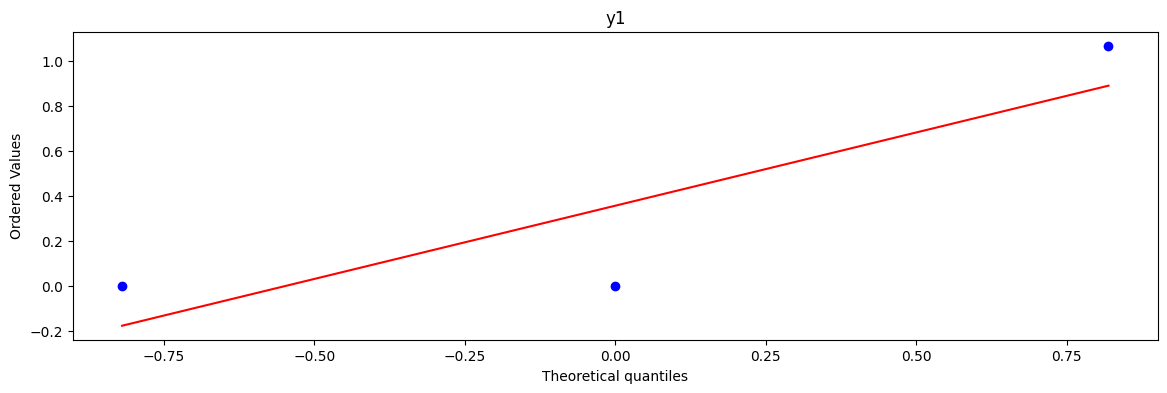

In [151]:
from matplotlib.pyplot import *
import scipy.stats as stats
fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)

stats.probplot(effects_df["Standardized effect"], dist="norm", plot=ax1)
ax1.set_title('y1')

In [154]:
s = "yhat = "

s += "%0.3f "%(combined_output['y1'].mean())

for i,k in enumerate(average_main_effects.keys()):
    if(average_main_effects[k]<0):
        s += "%0.3f %s "%( average_main_effects[k]/2.0, k )
    else:
        s += "+ %0.3f %s "%( average_main_effects[k]/2.0, k )

for i,k in enumerate(twoway_effects.keys()):
    if(twoway_effects[k]<0):
        s += " %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])
    else:
        s += "+ %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])

print(s)

yhat = 3.720 + 0.533 T + 0.001 c + 0.000 T c


In [155]:
sigmasquared = 0.0050
k = len(inputs_df.index)
Vmean = (sigmasquared)/(2**k)
Veffect = (4*sigmasquared)/(2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.001250
Variance in effects: 0.005000


In [156]:
sigmasquared = 0.0050
r=4
k = len(inputs_df.index)
Vmean = (sigmasquared)/(r*2**k)
Veffect = (4*sigmasquared)/(r*2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000313
Variance in effects: 0.001250


In [157]:
print(np.sqrt(Vmean))
print(np.sqrt(Veffect))

0.017677669529663688
0.035355339059327376
